In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

exp_json = "./experiment-20260123.json"

methods = ["bruteforce", "dfs", "hillclimb", "buildingwalk"]

df = pd.read_json(exp_json)
df.to_pickle("experiment.pickle")
df.to_csv("experiment.csv")
#print("Experiment:")
#print(df)

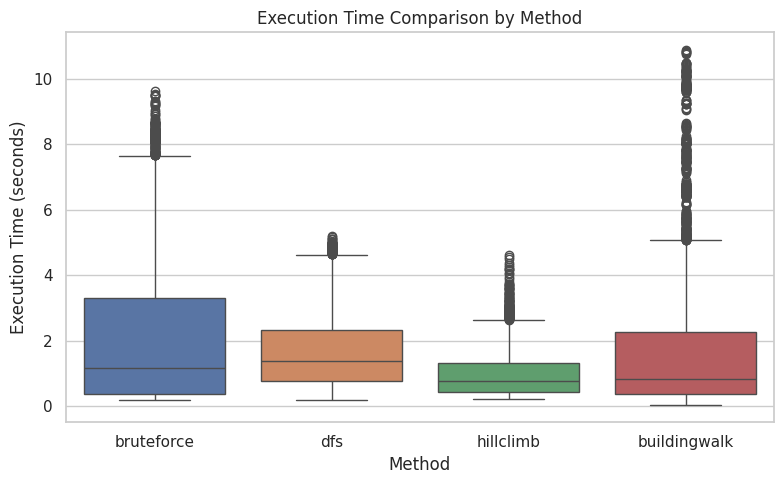

In [ ]:
plt.figure(figsize=(8, 5))

sns.boxplot(
    data=df,
    x="method",
    y="pai",
    order=methods,
    hue="method",
    hue_order=methods,
)

plt.xlabel("Method")
plt.ylabel("Execution Time (seconds)")
plt.title("Execution Time Comparison by Method")

plt.tight_layout()
plt.show()


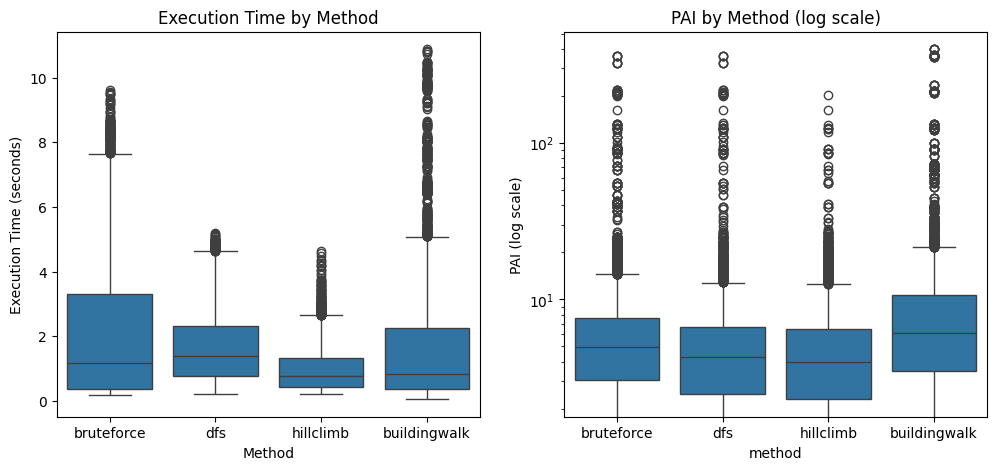

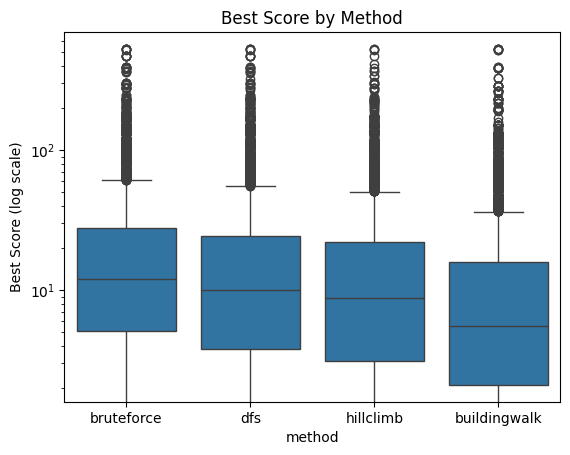

In [ ]:
# methods = ["bruteforce", "dfs", "hillclimb", "buildingwalk"]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Execution time
sns.boxplot(
    data=df,
    x="method",
    y="execution_time",
    order=methods,
    ax=axes[0]
)
axes[0].set_title("Execution Time by Method")
axes[0].set_xlabel("Method")
axes[0].set_ylabel("Execution Time (seconds)")

# PAI
sns.boxplot(
    data=df,
    x="method",
    y="pai",
    order=["bruteforce", "dfs", "hillclimb", "buildingwalk"]
)

plt.yscale("log")
plt.ylabel("PAI (log scale)")
plt.title("PAI by Method (log scale)")
plt.show()

sns.boxplot(
    data=df,
    x="method",
    y="best_score",
    order=["bruteforce", "dfs", "hillclimb", "buildingwalk"]
)

plt.yscale("log")
plt.ylabel("Best Score (log scale)")
plt.title("Best Score by Method")
plt.show()

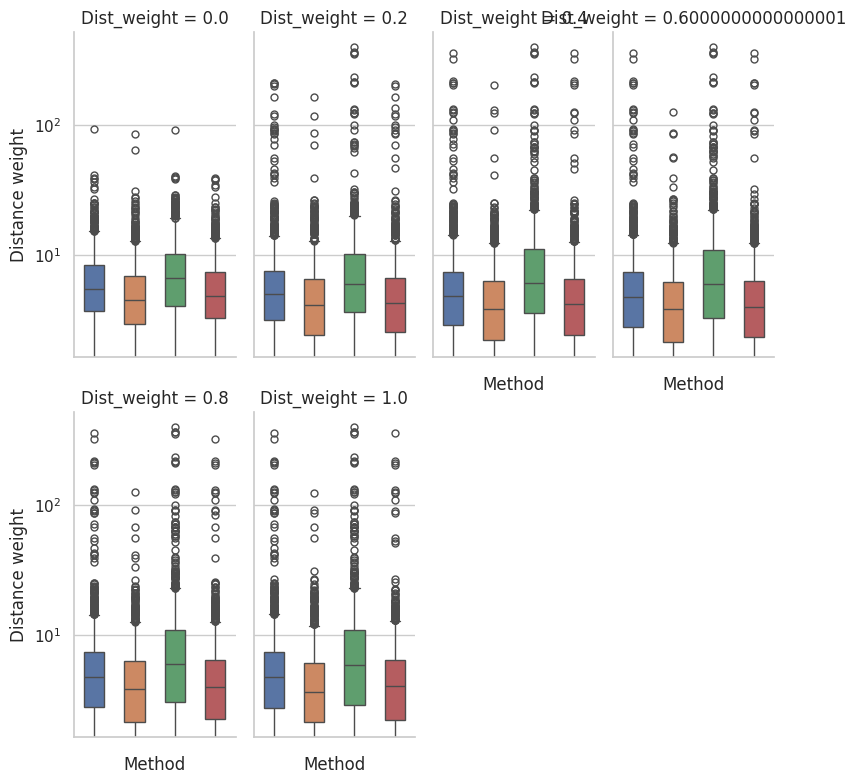

In [10]:
# PAI, One for each method
sns.set(style="whitegrid")

g = sns.catplot(
    data=df,
    x="method",
    y="pai",
    col="dist_weight",
    kind="box",
    col_wrap=4,
    height=4,
    sharey=True,
    width=0.5,
    aspect=0.5,
    hue="method",
)

g.set(yscale="log")
g.set_titles("Dist_weight = {col_name}")
g.set_axis_labels("Method", "Distance weight")
# plt.xticks(rotation=30)
g.set_xticklabels(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
df.nlargest(10, "best_score")
df.nlargest(10, "pai")
# precion at K kolla upp och använd som motivering
# gör för olika värden baserat per metod, radius och dist_weight

# motivera bort dist weight

# kör sedan 1, 5, 10, 25

,method,year,radius,dist_weight,num_startpoints,execution_time,best_score,ind_time,avg_time,steps,total_crimes,seen_crimes,unique_crime_coords,pai
72,bruteforce,2018,200,0.0,2507.0,2.30900,530.0,NaN,NaN,2507,601,530,11,14.050868
75,dfs,2018,200,0.0,10.0,1.48869,530.0,1.05052,1.20722,21,601,530,11,14.050868
168,bruteforce,2018,200,0.0,3182.0,2.88800,530.0,NaN,NaN,3182,612,530,11,14.009510
48,bruteforce,2018,150,0.0,1184.0,0.98900,528.0,NaN,NaN,1184,568,528,10,15.346412
50,buildingwalk,2018,150,0.0,NaN,0.61800,528.0,NaN,NaN,405,568,528,10,17.009398
51,dfs,2018,150,0.0,10.0,1.17846,528.0,0.72575,0.88829,21,568,528,10,15.346412
74,buildingwalk,2018,200,0.0,NaN,0.94300,528.0,NaN,NaN,662,601,528,10,24.072684
120,bruteforce,2018,100,0.0,925.0,0.59000,528.0,NaN,NaN,925,554,528,10,8.358904
121,hillclimb,2018,100,0.0,10.0,0.36292,528.0,0.16507,0.10624,3,554,528,10,8.416872
123,dfs,2018,100,0.0,10.0,0.80390,528.0,0.54085,0.52985,21,554,528,10,8.358904


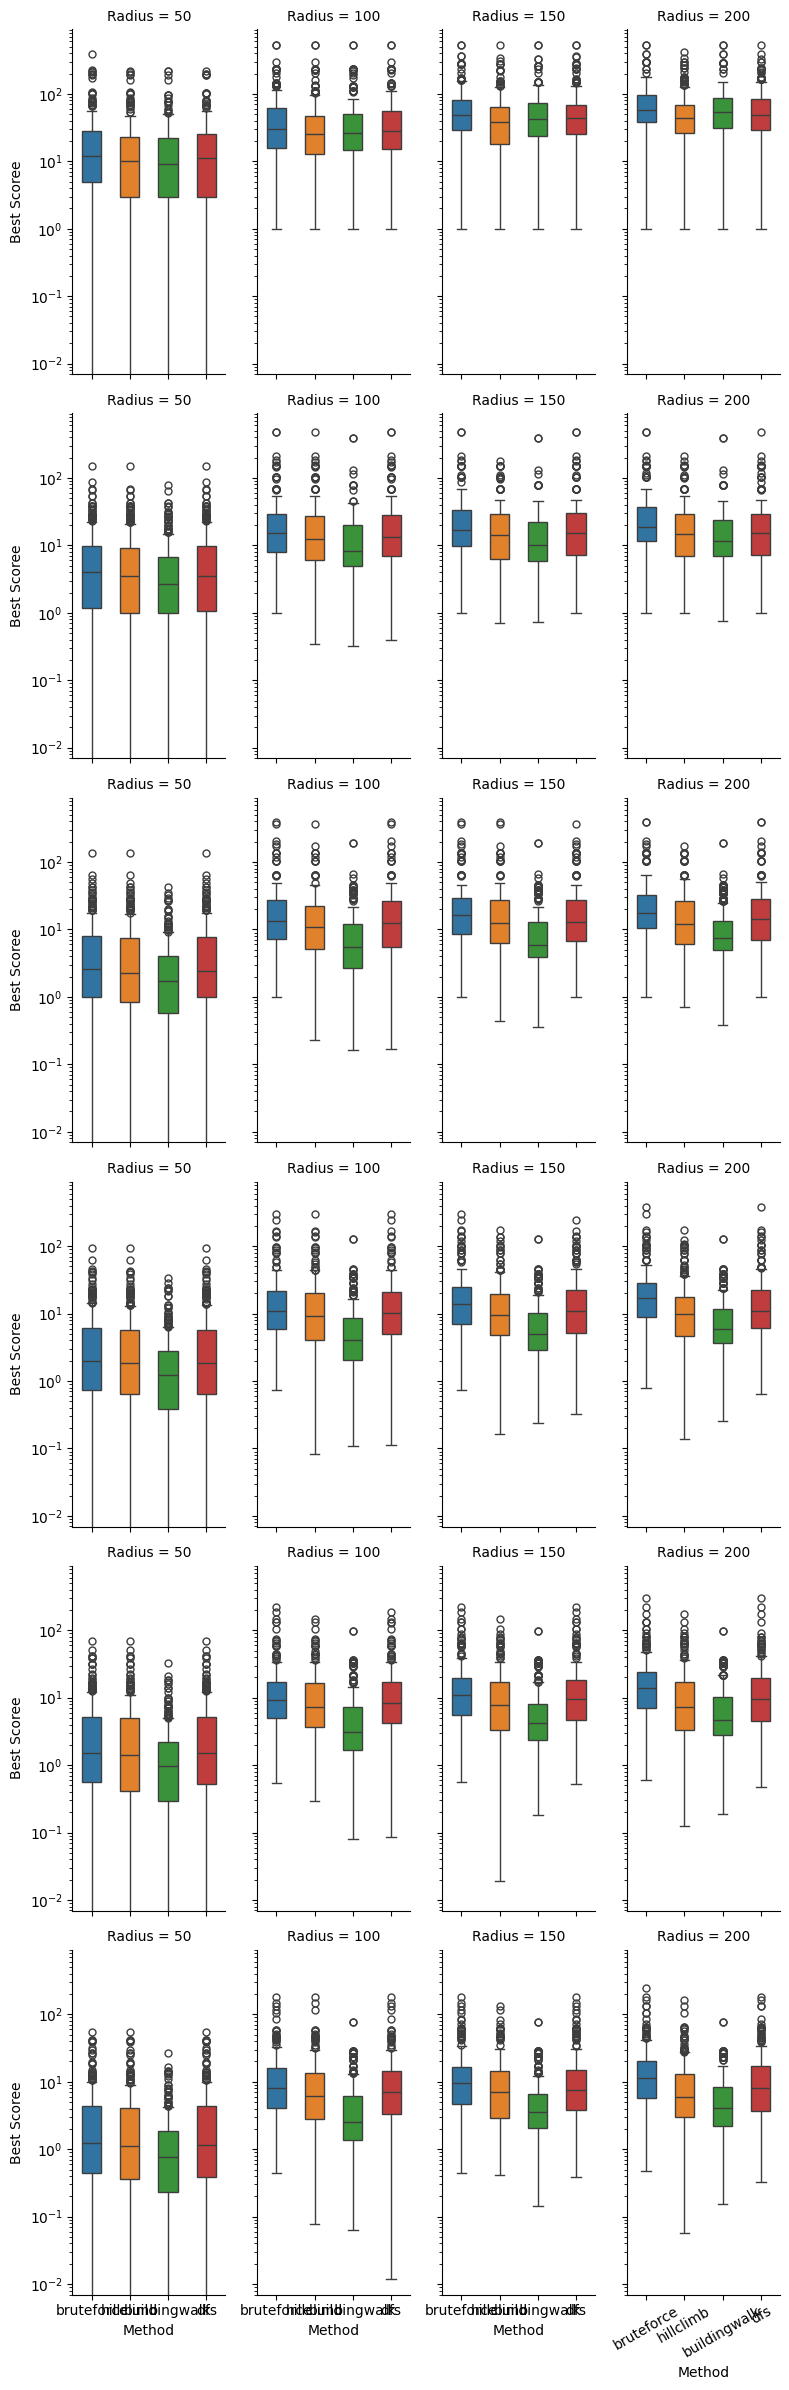

In [29]:
# Best score, one for each method

g = sns.catplot(
    data=df,
    x="method",
    y="best_score",
    col="radius",
    kind="box",
    # col_wrap=4,
    height=4,
    sharey=True,
    width=0.5,
    aspect=0.5,
    hue="method",
    row="dist_weight"
)

g.set(yscale="log")
g.set_titles("Radius = {col_name}")
g.set_axis_labels("Method", "Best Scoree")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

In [27]:
df.describe()

,year,radius,dist_weight,num_startpoints,execution_time,best_score,ind_time,avg_time,steps,total_crimes,seen_crimes,unique_crime_coords,pai
count,28800.000000,28800.00000,28800.000000,21600.000000,28800.000000,28800.000000,14400.000000,14400.000000,28800.000000,28800.000000,28800.000000,28800.000000,28800.000000
mean,2019.000000,125.00000,0.500000,480.884167,1.688634,20.289719,0.904168,0.877405,553.085104,190.193333,36.912708,4.486111,7.536315
std,0.816511,55.90267,0.341571,936.924430,1.704431,36.969023,0.837284,0.829417,885.030555,200.806473,55.221862,3.309044,17.887047
min,2018.000000,50.00000,0.000000,1.000000,0.053000,0.000000,0.014240,0.021460,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2018.000000,87.50000,0.200000,10.000000,0.552000,3.143996,0.300343,0.306405,18.000000,51.000000,9.000000,2.000000,2.708486
50%,2019.000000,125.00000,0.500000,10.000000,1.027430,8.876016,0.595435,0.540225,21.000000,120.000000,22.000000,4.000000,4.718873
75%,2020.000000,162.50000,0.800000,329.750000,2.209020,22.415771,1.283213,1.135608,787.250000,241.000000,43.000000,6.000000,7.733879
max,2020.000000,200.00000,1.000000,4639.000000,10.882000,530.000000,4.676620,4.658570,4639.000000,1163.000000,530.000000,24.000000,397.927780


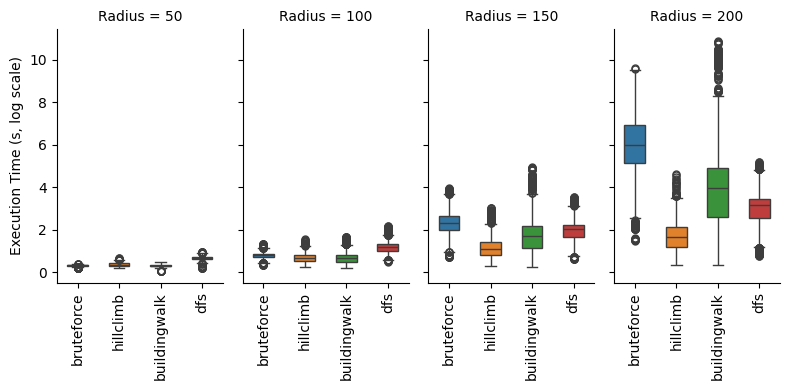

In [22]:
# Executio time, for all methods

g = sns.catplot(
    data=df,
    x="method",
    y="execution_time",
    col="radius",
    kind="box",
    col_wrap=4,
    height=4,
    sharey=True,
    width=0.5,
    aspect=0.5,
    hue="method"
)

# g.set(yscale="log")

g.set_titles("Radius = {col_name}")
g.set_axis_labels("", "Execution Time (s, log scale)")
# plt.xticks(rotation=30)
g.set_xticklabels(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
# pai_pivot_median = df.pivot_table(
#     values="pai",
#     index=["dist_weight", "method"],
#     columns="radius",
#     aggfunc="median"
# )

# pai_pivot_median

df = df.dropna(subset=["pai"])

pai_stats = df.pivot_table(
    values="pai",
    index=["dist_weight", "method"],
    columns="radius",
    aggfunc=["mean", "std"]
)

pai_stats

mean                                        std  \
radius                         50         100        150        200       50    
dist_weight method                                                              
0.0         bruteforce    5.766517   7.139941   7.170052   7.195613  6.735415   
            buildingwalk  6.123985   8.206588   8.470659   9.091312  7.017455   
            dfs           4.819970   6.407298   6.216054   6.057995  4.216904   
            hillclimb     4.612800   5.783763   5.734992   5.783220  6.060484   
0.2         bruteforce    5.070161   7.859995   8.645847  10.163924  6.570977   
            buildingwalk  5.458605  10.008718  11.560568  14.290160  6.953316   
            dfs           4.218880   6.770332   7.536762   7.348977  3.584593   
            hillclimb     4.188378   6.131755   5.234456   6.437586  3.747026   
0.4         bruteforce    4.526064   8.407435   9.058332  11.261070  4.073916   
            buildingwalk  5.310724  10.596883  12.745221  16.781452  6.979372   
            dfs           4.254404   6.626919   7.391904   8.260796  3.986656   
            hillclimb     4.000662   5.878079   6.486473   5.311424  3.804061   
0.6         bruteforce    4.425997   8.080886   9.003777  11.050808  4.091156   
            buildingwalk  5.254097  10.477528  12.771963  16.905594  6.986137   
            dfs           4.078724   6.315743   7.178443   8.675054  3.742922   
            hillclimb     3.933486   6.312001   5.064581   5.258219  3.935537   
0.8         bruteforce    4.421571   8.117935   8.924717  10.928287  4.090261   
            buildingwalk  5.221025  10.431040  12.668058  16.734337  6.997741   
            dfs           4.176764   6.670088   7.453374   7.404914  3.975939   
            hillclimb     3.787887   6.067589   5.327999   5.411603  3.634516   
1.0         bruteforce    4.396476   8.073867   8.924462  11.064264  4.095397   
            buildingwalk  5.219990  10.390304  12.541404  16.467150  6.998377   
            dfs           3.816497   6.511693   7.346933   7.544096  3.303632   
            hillclimb     3.754061   5.882494   5.224330   5.390469  3.491867   

                                                           
radius                          100        150        200  
dist_weight method                                         
0.0         bruteforce     4.820281   4.817535   4.675533  
            buildingwalk   5.039750   5.671517   6.099089  
            dfs            4.195135   4.031754   4.615361  
            hillclimb      3.718043   4.991003   4.332754  
0.2         bruteforce    12.887613  16.763283  23.211525  
            buildingwalk  17.656939  25.745320  41.987733  
            dfs           10.871256  16.463688  17.191102  
            hillclimb      9.584653   3.943249  10.530339  
0.4         bruteforce    15.971947  20.504202  33.015454  
            buildingwalk  18.172258  26.208559  42.856226  
            dfs           11.917861  18.666025  30.259474  
            hillclimb      8.383583  14.897075   4.624721  
0.6         bruteforce    15.461954  20.516843  32.981786  
            buildingwalk  18.206040  26.511784  43.103149  
            dfs           11.652673  18.612941  30.488369  
            hillclimb     10.697232   4.963740   4.668342  
0.8         bruteforce    15.456548  20.493001  32.997958  
            buildingwalk  18.227566  26.494695  43.115845  
            dfs           12.257928  19.840653  23.049955  
            hillclimb      8.662968   6.451250   6.045898  
1.0         bruteforce    15.450494  20.495944  33.014453  
            buildingwalk  18.238809  26.489528  43.154724  
            dfs           11.877074  19.391719  24.678899  
            hillclimb      9.446254   6.400654   6.149277

In [31]:
df["area_fraction"] = df["seen_crimes"] / df["total_crimes"] / df["pai"]
df["area_fraction"]

0        0.085484
1        0.067612
2        0.056873
3             NaN
4        0.085484
           ...   
28795    0.041924
28796    0.041924
28797    0.061152
28798    0.033305
28799    0.041924
Name: area_fraction, Length: 28800, dtype: float64

In [34]:
pai_stats_flat = pai_stats.copy()
pai_stats_flat.columns = ['{}_{}'.format(stat, radius) for stat, radius in pai_stats_flat.columns]
pai_stats_flat.reset_index(inplace=True)

# Convert to LaTeX
latex_code = pai_stats_flat.to_latex(
    index=False,           # don't include pandas index
    float_format="%.3f",   # format floats
    caption="PAI Statistics by Method and Distance Weight",
    label="tab:pai_stats",
    column_format='llcccc' # adjust based on number of columns
)

print(latex_code)

\begin{table}
\caption{PAI Statistics by Method and Distance Weight}
\label{tab:pai_stats}
\begin{tabular}{llcccc}
\toprule
dist_weight & method & mean_50 & mean_100 & mean_150 & mean_200 & std_50 & std_100 & std_150 & std_200 \\
\midrule
0.000 & bruteforce & 5.767 & 7.140 & 7.170 & 7.196 & 6.735 & 4.820 & 4.818 & 4.676 \\
0.000 & buildingwalk & 6.124 & 8.207 & 8.471 & 9.091 & 7.017 & 5.040 & 5.672 & 6.099 \\
0.000 & dfs & 4.820 & 6.407 & 6.216 & 6.058 & 4.217 & 4.195 & 4.032 & 4.615 \\
0.000 & hillclimb & 4.613 & 5.784 & 5.735 & 5.783 & 6.060 & 3.718 & 4.991 & 4.333 \\
0.200 & bruteforce & 5.070 & 7.860 & 8.646 & 10.164 & 6.571 & 12.888 & 16.763 & 23.212 \\
0.200 & buildingwalk & 5.459 & 10.009 & 11.561 & 14.290 & 6.953 & 17.657 & 25.745 & 41.988 \\
0.200 & dfs & 4.219 & 6.770 & 7.537 & 7.349 & 3.585 & 10.871 & 16.464 & 17.191 \\
0.200 & hillclimb & 4.188 & 6.132 & 5.234 & 6.438 & 3.747 & 9.585 & 3.943 & 10.530 \\
0.400 & bruteforce & 4.526 & 8.407 & 9.058 & 11.261 & 4.074 & 15.972 & 

In [39]:
# Combine mean and std into a single column for each radius
pai_stats_combined = pai_stats.copy()

combined_cols = {}
for radius in pai_stats.columns.levels[1]:
    mean_col = ('mean', radius)
    std_col = ('std', radius)
    # convert radius to string for assign
    combined_cols[str(radius)] = pai_stats[mean_col].round(2).astype(str) + " ± " + pai_stats[std_col].round(2).astype(str)

# Assign new columns
pai_stats_table = pai_stats_combined.assign(**combined_cols)

# Keep only combined columns for display
display_cols = ["50", "100", "150", "200"]
pai_stats_table = pai_stats_table[display_cols].copy()
pai_stats_table = pai_stats_table.reset_index()  # bring index into columns

# Convert to LaTeX
latex_code = pai_stats_table.to_latex(
    index=False,
    caption="PAI Statistics (mean ± std) by Method and Distance Weight",
    label="tab:pai_stats_combined",
    column_format='llcccc',
    escape=False
)

print(latex_code)


\begin{table}
\caption{PAI Statistics (mean ± std) by Method and Distance Weight}
\label{tab:pai_stats_combined}
\begin{tabular}{llcccc}
\toprule
dist_weight & method & 50 & 100 & 150 & 200 \\
 &  &  &  &  &  \\
\midrule
0.000000 & bruteforce & 5.77 ± 6.74 & 7.14 ± 4.82 & 7.17 ± 4.82 & 7.2 ± 4.68 \\
0.000000 & buildingwalk & 6.12 ± 7.02 & 8.21 ± 5.04 & 8.47 ± 5.67 & 9.09 ± 6.1 \\
0.000000 & dfs & 4.82 ± 4.22 & 6.41 ± 4.2 & 6.22 ± 4.03 & 6.06 ± 4.62 \\
0.000000 & hillclimb & 4.61 ± 6.06 & 5.78 ± 3.72 & 5.73 ± 4.99 & 5.78 ± 4.33 \\
0.200000 & bruteforce & 5.07 ± 6.57 & 7.86 ± 12.89 & 8.65 ± 16.76 & 10.16 ± 23.21 \\
0.200000 & buildingwalk & 5.46 ± 6.95 & 10.01 ± 17.66 & 11.56 ± 25.75 & 14.29 ± 41.99 \\
0.200000 & dfs & 4.22 ± 3.58 & 6.77 ± 10.87 & 7.54 ± 16.46 & 7.35 ± 17.19 \\
0.200000 & hillclimb & 4.19 ± 3.75 & 6.13 ± 9.58 & 5.23 ± 3.94 & 6.44 ± 10.53 \\
0.400000 & bruteforce & 4.53 ± 4.07 & 8.41 ± 15.97 & 9.06 ± 20.5 & 11.26 ± 33.02 \\
0.400000 & buildingwalk & 5.31 ± 6.98 & 10.6 ± 1

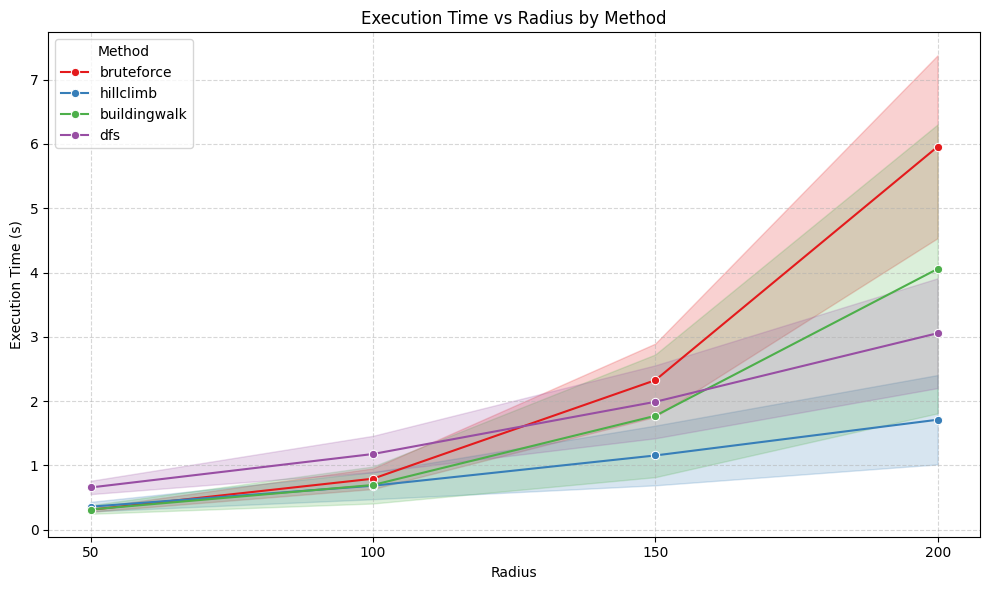

In [21]:
df['radius'] = df['radius'].astype(int)
plt.figure(figsize=(10, 6))

# Line plot: x = radius, y = execution time, hue = method
sns.lineplot(
    x='radius',
    y='execution_time',
    hue='method',
    data=df,
    marker='o',    # shows points
    palette='Set1',
    # err_style='band',  # optional: show confidence interval as band
    errorbar='sd'            # optional: show standard deviation
)

plt.xlabel("Radius")
plt.ylabel("Execution Time (s)")
plt.title("Execution Time vs Radius by Method")
# plt.yscale('log')  # optional if values differ a lot
plt.xticks([50, 100, 150, 200])
plt.legend(title="Method")
plt.grid(True, which='both', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig('exec_time_by_radius.png')
plt.show()

In [20]:
df.shape

(28800, 14)

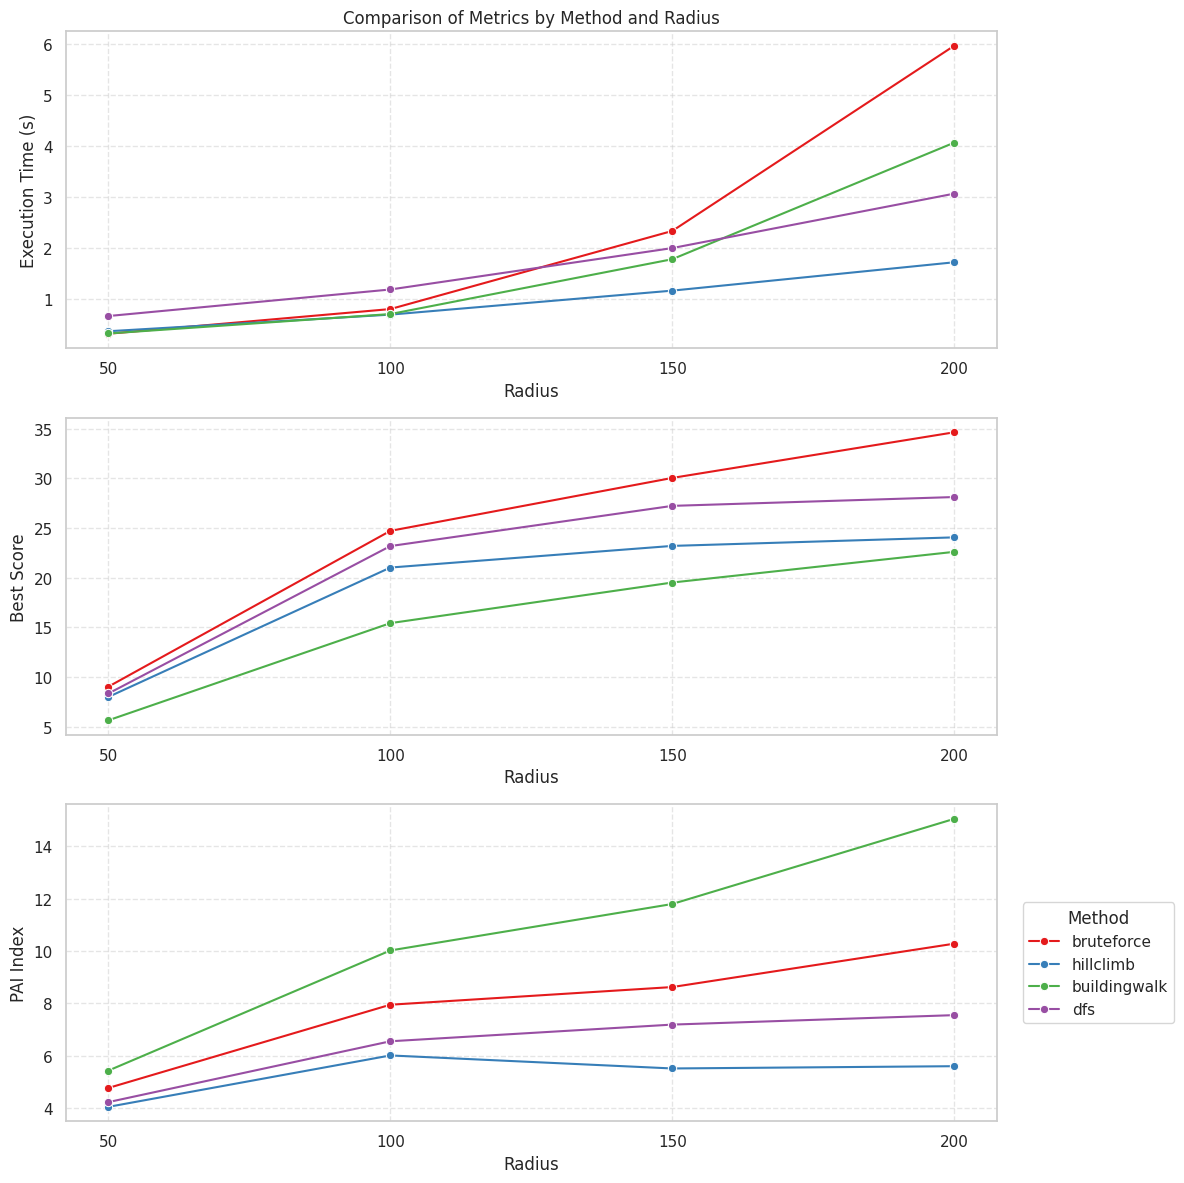

In [ ]:
df['radius'] = df['radius'].astype(int)

metrics = ['execution_time', 'best_score', 'pai']
ylabels = ['Execution Time (s)', 'Best Score', 'PAI Index']

plt.figure(figsize=(12, 12))

for i, metric in enumerate(metrics, 1):
    ax = plt.subplot(3, 1, i)

    sns.lineplot(
        x='radius',
        y=metric,
        hue='method',
        data=df,
        marker='o',
        errorbar=None,
        palette='Set1'
    )

    ax.set_xlabel("Radius")
    ax.set_ylabel(ylabels[i-1])
    ax.set_xticks([50, 100, 150, 200])
    ax.grid(True, linestyle='--', alpha=0.5)
    if i == 1:
        ax.set_title("Comparison of Metrics by Method and Radius")
    if i < 3:
        ax.get_legend().remove()  # only show legend on last plot

plt.legend(title='Method', bbox_to_anchor=(1.02, 0.5), loc='center left')
plt.tight_layout()
plt.savefig('lines-all-metrics.png')
plt.show()